# 훈련 40만 테스트 5만 에포크 100 러닝레이트 0.01

In [1]:
# 필요한 라이브러리 임포트
import os
import json
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import shutil
from torchvision import models
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.datasets.folder import default_loader
from tqdm import tqdm
import time

# 이미지 조정(전처리) - 텐서화, 정규화, 크기 조정

In [2]:
# 전처리 작업을 정의
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [3]:
test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# GPU 사용가능 여부 판단

In [4]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print('GPU')
else:
    device = torch.device("cpu")
    print('CPU')

GPU


# 데이터 로더

In [5]:
from torchvision import transforms, datasets
import torchvision
import torchvision
from torchvision import transforms

In [6]:
# train 데이터셋 생성
trainset = torchvision.datasets.ImageFolder(
    root="C://Users//User//Desktop//capstone//손상//손상 학습 데이터",
    transform = train_transforms)

# 훈련 데이터 로드
trainloader = DataLoader(trainset, batch_size=32, shuffle=True, num_workers=4)

In [7]:
# test 데이터셋 생성
testset = torchvision.datasets.ImageFolder(
    root="C://Users//User//Desktop//capstone//손상//손상 테스트 데이터",
    transform = test_transforms)

# 테스트 데이터 로드
testloader = DataLoader(testset, batch_size=32, shuffle=False)

# 모델 로드

In [8]:
# ResNet-50 모델 로드
model = models.resnet50(pretrained=True)

C:\Users\User\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# 레이어 수정 및 손실 함수, 옵티마이저 설정

In [9]:
# 모델의 FC 레이어 수정
num_classes = len(trainset.classes)
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

# 손실 함수 및 옵티마이저 정의
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 모델 학습

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 100
train_losses = []
test_losses = []
train_acc = []
test_acc = []

for epoch in range(num_epochs):
    for phase in ['train']:
        if phase == 'train':
            model.train()
            
        corrects = 0
        total = 0
        running_loss = 0.0

        for inputs, labels in tqdm(trainloader, desc=f'Epoch {epoch}/{num_epochs}', unit='batch'):
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()
            total += labels.size(0)
            running_loss += loss.item()
            corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / total
        epoch_acc = corrects / total

        print(f'훈련 정확도: {epoch_acc:.4f} Loss: {epoch_loss:.4f}')
    
        train_losses.append(epoch_loss)
        train_acc.append(epoch_acc)
    
        # 평가 모드로 설정
        model.eval()

        # 평가를 위한 변수 초기화
        corrects = 0
        total = 0
        test_loss = 0.0

        # tqdm으로 래핑하여 진행 상황 표시
        with torch.no_grad():
            for inputs, labels in tqdm(testloader, total=len(testloader)):
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                corrects += torch.sum(preds == labels.data)
                total += labels.size(0)
                loss = criterion(outputs, labels)
                test_loss += loss.item()

        # 정확도 계산
        accuracy = corrects / total

        # 평가 손실 계산
        test_loss /= len(testloader.dataset)

        print(f"테스트 정확도: {accuracy:.4f} loss: {test_loss:.4f}")
    
        test_losses.append(test_loss)
        test_acc.append(accuracy)

print("Training complete")

Epoch 0/100: 100%|████████████████████████████████████████████████████████████| 12612/12612 [20:19<00:00, 10.34batch/s]


훈련 정확도: 0.5604 Loss: 0.0322


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:10<00:00,  2.87it/s]


테스트 정확도: 0.6832 loss: 0.0260


Epoch 1/100: 100%|████████████████████████████████████████████████████████████| 12612/12612 [19:52<00:00, 10.57batch/s]


훈련 정확도: 0.6038 Loss: 0.0297


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:09<00:00,  2.87it/s]


테스트 정확도: 0.6838 loss: 0.0256


Epoch 2/100: 100%|████████████████████████████████████████████████████████████| 12612/12612 [19:54<00:00, 10.55batch/s]


훈련 정확도: 0.6204 Loss: 0.0286


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:14<00:00,  2.85it/s]


테스트 정확도: 0.6921 loss: 0.0257


Epoch 3/100: 100%|████████████████████████████████████████████████████████████| 12612/12612 [19:52<00:00, 10.57batch/s]


훈련 정확도: 0.6296 Loss: 0.0280


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:06<00:00,  2.89it/s]


테스트 정확도: 0.6897 loss: 0.0251


Epoch 4/100: 100%|████████████████████████████████████████████████████████████| 12612/12612 [19:53<00:00, 10.56batch/s]


훈련 정확도: 0.6386 Loss: 0.0275


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:06<00:00,  2.89it/s]


테스트 정확도: 0.7040 loss: 0.0242


Epoch 5/100: 100%|████████████████████████████████████████████████████████████| 12612/12612 [19:54<00:00, 10.56batch/s]


훈련 정확도: 0.6450 Loss: 0.0270


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:10<00:00,  2.86it/s]


테스트 정확도: 0.6965 loss: 0.0249


Epoch 6/100: 100%|████████████████████████████████████████████████████████████| 12612/12612 [19:52<00:00, 10.57batch/s]


훈련 정확도: 0.6511 Loss: 0.0266


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:06<00:00,  2.89it/s]


테스트 정확도: 0.7135 loss: 0.0241


Epoch 7/100: 100%|████████████████████████████████████████████████████████████| 12612/12612 [20:03<00:00, 10.48batch/s]


훈련 정확도: 0.6566 Loss: 0.0263


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:05<00:00,  2.89it/s]


테스트 정확도: 0.7037 loss: 0.0245


Epoch 8/100: 100%|████████████████████████████████████████████████████████████| 12612/12612 [19:51<00:00, 10.58batch/s]


훈련 정확도: 0.6617 Loss: 0.0259


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:09<00:00,  2.87it/s]


테스트 정확도: 0.7123 loss: 0.0238


Epoch 9/100: 100%|████████████████████████████████████████████████████████████| 12612/12612 [19:52<00:00, 10.58batch/s]


훈련 정확도: 0.6664 Loss: 0.0256


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:09<00:00,  2.87it/s]


테스트 정확도: 0.7083 loss: 0.0240


Epoch 10/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [19:52<00:00, 10.57batch/s]


훈련 정확도: 0.6703 Loss: 0.0253


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:06<00:00,  2.89it/s]


테스트 정확도: 0.6949 loss: 0.0249


Epoch 11/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [19:55<00:00, 10.55batch/s]


훈련 정확도: 0.6746 Loss: 0.0250


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:04<00:00,  2.90it/s]


테스트 정확도: 0.7150 loss: 0.0236


Epoch 12/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [19:53<00:00, 10.56batch/s]


훈련 정확도: 0.6788 Loss: 0.0247


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:05<00:00,  2.89it/s]


테스트 정확도: 0.7019 loss: 0.0247


Epoch 13/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:00<00:00, 10.51batch/s]


훈련 정확도: 0.6820 Loss: 0.0245


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:20<00:00,  2.82it/s]


테스트 정확도: 0.7232 loss: 0.0228


Epoch 14/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:07<00:00, 10.45batch/s]


훈련 정확도: 0.6863 Loss: 0.0242


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:17<00:00,  2.83it/s]


테스트 정확도: 0.7156 loss: 0.0236


Epoch 15/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:09<00:00, 10.42batch/s]


훈련 정확도: 0.6890 Loss: 0.0240


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:12<00:00,  2.85it/s]


테스트 정확도: 0.7081 loss: 0.0240


Epoch 16/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:27<00:00, 10.28batch/s]


훈련 정확도: 0.6916 Loss: 0.0238


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:16<00:00,  2.84it/s]


테스트 정확도: 0.7094 loss: 0.0240


Epoch 17/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:41<00:00, 10.16batch/s]


훈련 정확도: 0.6952 Loss: 0.0236


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:12<00:00,  2.85it/s]


테스트 정확도: 0.7141 loss: 0.0237


Epoch 18/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:12<00:00, 10.41batch/s]


훈련 정확도: 0.6978 Loss: 0.0233


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:19<00:00,  2.82it/s]


테스트 정확도: 0.7023 loss: 0.0244


Epoch 19/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:09<00:00, 10.43batch/s]


훈련 정확도: 0.6999 Loss: 0.0232


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:14<00:00,  2.85it/s]


테스트 정확도: 0.7148 loss: 0.0238


Epoch 20/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:12<00:00, 10.40batch/s]


훈련 정확도: 0.7040 Loss: 0.0229


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:14<00:00,  2.85it/s]


테스트 정확도: 0.7059 loss: 0.0246


Epoch 21/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:06<00:00, 10.45batch/s]


훈련 정확도: 0.7063 Loss: 0.0227


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:14<00:00,  2.84it/s]


테스트 정확도: 0.7068 loss: 0.0243


Epoch 22/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:07<00:00, 10.45batch/s]


훈련 정확도: 0.7088 Loss: 0.0226


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:16<00:00,  2.84it/s]


테스트 정확도: 0.7053 loss: 0.0242


Epoch 23/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:09<00:00, 10.43batch/s]


훈련 정확도: 0.7124 Loss: 0.0223


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:15<00:00,  2.84it/s]


테스트 정확도: 0.7114 loss: 0.0240


Epoch 24/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:25<00:00, 10.29batch/s]


훈련 정확도: 0.7132 Loss: 0.0222


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:14<00:00,  2.84it/s]


테스트 정확도: 0.6899 loss: 0.0260


Epoch 25/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:06<00:00, 10.45batch/s]


훈련 정확도: 0.7162 Loss: 0.0220


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:15<00:00,  2.84it/s]


테스트 정확도: 0.7033 loss: 0.0249


Epoch 26/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:06<00:00, 10.45batch/s]


훈련 정확도: 0.7192 Loss: 0.0218


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:20<00:00,  2.82it/s]


테스트 정확도: 0.6930 loss: 0.0262


Epoch 27/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:09<00:00, 10.42batch/s]


훈련 정확도: 0.7218 Loss: 0.0216


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:15<00:00,  2.84it/s]


테스트 정확도: 0.7118 loss: 0.0241


Epoch 28/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:12<00:00, 10.40batch/s]


훈련 정확도: 0.7237 Loss: 0.0214


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:15<00:00,  2.84it/s]


테스트 정확도: 0.7101 loss: 0.0253


Epoch 29/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:10<00:00, 10.42batch/s]


훈련 정확도: 0.7263 Loss: 0.0212


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:10<00:00,  2.86it/s]


테스트 정확도: 0.6945 loss: 0.0260


Epoch 30/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:08<00:00, 10.44batch/s]


훈련 정확도: 0.7287 Loss: 0.0210


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:11<00:00,  2.86it/s]


테스트 정확도: 0.7011 loss: 0.0255


Epoch 31/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:12<00:00, 10.40batch/s]


훈련 정확도: 0.7309 Loss: 0.0209


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:09<00:00,  2.87it/s]


테스트 정확도: 0.7115 loss: 0.0249


Epoch 32/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:21<00:00, 10.32batch/s]


훈련 정확도: 0.7325 Loss: 0.0207


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:11<00:00,  2.86it/s]


테스트 정확도: 0.6871 loss: 0.0269


Epoch 33/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:33<00:00, 10.22batch/s]


훈련 정확도: 0.7351 Loss: 0.0206


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:12<00:00,  2.85it/s]


테스트 정확도: 0.6988 loss: 0.0263


Epoch 34/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:05<00:00, 10.46batch/s]


훈련 정확도: 0.7373 Loss: 0.0204


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:15<00:00,  2.84it/s]


테스트 정확도: 0.7155 loss: 0.0246


Epoch 35/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:11<00:00, 10.41batch/s]


훈련 정확도: 0.7395 Loss: 0.0202


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:12<00:00,  2.85it/s]


테스트 정확도: 0.7172 loss: 0.0249


Epoch 36/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:24<00:00, 10.30batch/s]


훈련 정확도: 0.7421 Loss: 0.0200


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:17<00:00,  2.83it/s]


테스트 정확도: 0.7202 loss: 0.0248


Epoch 37/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:07<00:00, 10.44batch/s]


훈련 정확도: 0.7454 Loss: 0.0198


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:12<00:00,  2.86it/s]


테스트 정확도: 0.6424 loss: 0.0305


Epoch 38/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:06<00:00, 10.46batch/s]


훈련 정확도: 0.7477 Loss: 0.0197


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:15<00:00,  2.84it/s]


테스트 정확도: 0.7043 loss: 0.0257


Epoch 39/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:12<00:00, 10.40batch/s]


훈련 정확도: 0.7500 Loss: 0.0195


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:16<00:00,  2.83it/s]


테스트 정확도: 0.6939 loss: 0.0268


Epoch 40/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:29<00:00, 10.26batch/s]


훈련 정확도: 0.7519 Loss: 0.0193


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:16<00:00,  2.83it/s]


테스트 정확도: 0.6778 loss: 0.0281


Epoch 41/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:19<00:00, 10.35batch/s]


훈련 정확도: 0.7547 Loss: 0.0192


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:19<00:00,  2.82it/s]


테스트 정확도: 0.6929 loss: 0.0269


Epoch 42/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [20:46<00:00, 10.12batch/s]


훈련 정확도: 0.7559 Loss: 0.0190


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:11<00:00,  2.86it/s]


테스트 정확도: 0.6890 loss: 0.0277


Epoch 43/100: 100%|███████████████████████████████████████████████████████████| 12612/12612 [21:17<00:00,  9.87batch/s]


훈련 정확도: 0.7587 Loss: 0.0188


100%|██████████████████████████████████████████████████████████████████████████████| 1577/1577 [09:38<00:00,  2.73it/s]


테스트 정확도: 0.6877 loss: 0.0280


Epoch 44/100:  56%|█████████████████████████████████▌                          | 7052/12612 [11:57<08:41, 10.66batch/s]

In [ ]:
train_ac = []
test_ac = []

train_losse = [f'{loss:.4f}' for loss in train_losses]
test_losse = [f'{loss:.4f}' for loss in test_losses]

print(train_losse)
print(test_losse)

train_ac = [f'{acc:.4f}' for acc in train_acc]
test_ac = [f'{acc:.4f}' for acc in test_acc]

print(train_ac)
print(test_ac)

# 학습 모델 저장

In [ ]:
# 모델을 저장할 경로
model_path = "C://Users//User//Desktop//capstone//손상//손상 모델//damage_resnet_11_24.pth"

# 전체 모델을 저장
torch.save(model, model_path)

In [ ]:
# 모델을 저장할 경로
model_path = "C://Users//User//Desktop//capstone//손상//손상 모델//damage_resnet_11_24_state.pth"

# 학습된 모델 파라미터을 저장
torch.save(model.state_dict(), model_path)

In [3]:
# 학습한 모델 불러오기
model = torch.load("C://Users//User//Desktop//capstone//손상 20만장//model//VGGdmodel.pth")

# 정확도, 손실함수 시각화

In [1]:
train_losse = ['0.0348', '0.0325', '0.0315', '0.0308', '0.0302', '0.0297', '0.0293', '0.0288', '0.0284', '0.0281', '0.0277', '0.0274', '0.0271', '0.0268', '0.0265', '0.0262', '0.0259', '0.0257', '0.0253', '0.0251', '0.0248', '0.0245', '0.0243', '0.0240', '0.0237', '0.0235', '0.0232', '0.0230', '0.0227', '0.0225', '0.0222', '0.0219', '0.0216', '0.0214', '0.0212', '0.0209', '0.0207', '0.0205', '0.0202', '0.0200', '0.0196', '0.0194', '0.0191', '0.0189', '0.0187', '0.0185', '0.0182', '0.0180', '0.0178', '0.0175', '0.0173', '0.0170', '0.0169', '0.0166', '0.0165', '0.0162', '0.0160', '0.0159', '0.0156', '0.0155', '0.0153', '0.0150', '0.0149', '0.0147', '0.0145', '0.0143', '0.0142', '0.0140', '0.0138', '0.0137', '0.0136', '0.0134', '0.0133', '0.0131', '0.0130', '0.0129', '0.0127', '0.0126', '0.0125', '0.0123', '0.0122', '0.0121', '0.0120', '0.0119', '0.0117', '0.0117', '0.0115', '0.0114', '0.0113', '0.0112', '0.0111', '0.0110', '0.0109', '0.0108', '0.0107', '0.0106', '0.0106', '0.0104', '0.0104', '0.0103']
test_losse = ['0.0298', '0.0326', '0.0310', '0.0321', '0.0296', '0.0286', '0.0286', '0.0282', '0.0279', '0.0282', '0.0291', '0.0270', '0.0289', '0.0293', '0.0287', '0.0307', '0.0329', '0.0274', '0.0287', '0.0288', '0.0299', '0.0292', '0.0314', '0.0304', '0.0298', '0.0298', '0.0316', '0.0282', '0.0322', '0.0312', '0.0336', '0.0327', '0.0335', '0.0351', '0.0328', '0.0337', '0.0361', '0.0352', '0.0350', '0.0357', '0.0369', '0.0362', '0.0374', '0.0389', '0.0377', '0.0443', '0.0361', '0.0425', '0.0408', '0.0406', '0.0418', '0.0432', '0.0394', '0.0414', '0.0421', '0.0437', '0.0423', '0.0463', '0.0436', '0.0448', '0.0462', '0.0487', '0.0453', '0.0474', '0.0508', '0.0465', '0.0482', '0.0494', '0.0533', '0.0473', '0.0507', '0.0524', '0.0539', '0.0521', '0.0508', '0.0516', '0.0513', '0.0533', '0.0552', '0.0526', '0.0577', '0.0550', '0.0524', '0.0572', '0.0551', '0.0563', '0.0557', '0.0557', '0.0573', '0.0529', '0.0670', '0.0599', '0.0591', '0.0599', '0.0615', '0.0594', '0.0589', '0.0637', '0.0646', '0.0628']
train_ac = ['0.5192', '0.5629', '0.5802', '0.5914', '0.6012', '0.6090', '0.6153', '0.6226', '0.6281', '0.6328', '0.6395', '0.6432', '0.6477', '0.6515', '0.6556', '0.6613', '0.6633', '0.6671', '0.6724', '0.6759', '0.6793', '0.6833', '0.6871', '0.6902', '0.6941', '0.6977', '0.6999', '0.7032', '0.7075', '0.7122', '0.7142', '0.7182', '0.7215', '0.7256', '0.7286', '0.7316', '0.7352', '0.7385', '0.7419', '0.7442', '0.7499', '0.7525', '0.7554', '0.7597', '0.7618', '0.7648', '0.7684', '0.7717', '0.7741', '0.7781', '0.7801', '0.7841', '0.7864', '0.7889', '0.7909', '0.7950', '0.7971', '0.7986', '0.8025', '0.8050', '0.8079', '0.8109', '0.8118', '0.8148', '0.8177', '0.8206', '0.8218', '0.8233', '0.8260', '0.8280', '0.8306', '0.8326', '0.8331', '0.8361', '0.8372', '0.8386', '0.8410', '0.8426', '0.8437', '0.8468', '0.8488', '0.8482', '0.8498', '0.8522', '0.8533', '0.8548', '0.8568', '0.8581', '0.8596', '0.8610', '0.8616', '0.8630', '0.8644', '0.8662', '0.8662', '0.8677', '0.8685', '0.8703', '0.8708', '0.8712']
test_ac = ['0.6210', '0.5771', '0.5964', '0.5845', '0.6263', '0.6322', '0.6371', '0.6455', '0.6466', '0.6483', '0.6322', '0.6620', '0.6412', '0.6328', '0.6452', '0.6208', '0.6049', '0.6650', '0.6451', '0.6510', '0.6377', '0.6471', '0.6222', '0.6359', '0.6400', '0.6478', '0.6342', '0.6636', '0.6224', '0.6505', '0.6281', '0.6311', '0.6146', '0.6050', '0.6363', '0.6290', '0.6097', '0.6192', '0.6240', '0.6333', '0.6217', '0.6347', '0.6219', '0.6053', '0.6048', '0.5761', '0.6447', '0.5963', '0.6234', '0.6248', '0.6010', '0.5993', '0.6212', '0.6165', '0.6074', '0.5973', '0.6223', '0.5945', '0.6181', '0.6138', '0.6029', '0.6019', '0.6054', '0.6082', '0.5889', '0.6073', '0.5952', '0.5938', '0.5878', '0.6135', '0.6057', '0.6042', '0.5875', '0.5998', '0.6058', '0.6036', '0.6093', '0.5980', '0.5802', '0.6016', '0.5747', '0.5965', '0.5941', '0.5869', '0.5844', '0.5894', '0.5899', '0.5909', '0.6019', '0.6146', '0.5701', '0.5905', '0.5927', '0.5967', '0.5851', '0.5866', '0.5903', '0.5854', '0.5807', '0.5862']
train_ac = [float(val) if isinstance(val, str) else val for val in train_ac]
test_ac = [float(val) if isinstance(val, str) else val for val in test_ac]
train_losse = [float(val) if isinstance(val, str) else val for val in train_losse]
test_losse = [float(val) if isinstance(val, str) else val for val in test_losse]

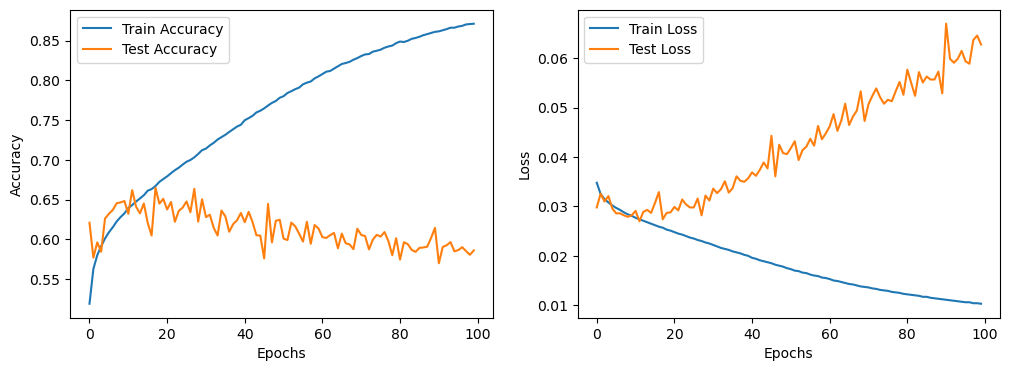

In [2]:
import matplotlib.pyplot as plt

# 정확도와 손실 그래프 그리기
plt.figure(figsize=(12, 4))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(train_ac, label='Train Accuracy')
plt.plot(test_ac, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss 그래프
plt.subplot(1, 2, 2)
plt.plot(train_losse, label='Train Loss')
plt.plot(test_losse, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 이미지 판별

In [1]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
# 이미지 경로
image_path = 'C://Users//User/Desktop//capstone//모델 평가 샘플//car.jpg'

# 이미지를 불러오고 전처리
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

# 이미지 불러오기
image = Image.open(image_path)

# 전처리 적용
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)

# GPU 사용 가능하면 GPU로 전환
if torch.cuda.is_available():
    input_batch = input_batch.to('cpu')

# 모델 불러오기 
model = torch.load("C://Users//User//Desktop//capstone//손상//손상 모델//damage_11_24_resnet50.pth")
model.eval()

# 이미지 모델에 전달하여 판별
with torch.no_grad():
    output = model(input_batch)

class_labels = ['Breakage', 'Scratched', 'Separated', 'Crushed']
# 판별 결과 해석 
_, predicted_class = output.max(1)
print(class_labels[predicted_class.item()])  # 예측된 클래스의 인덱스 출력


RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt


# 이미지 열기
image = Image.open(image_path)

# 이미지 크기 조정
new_size = (300, 300)  
image = image.resize(new_size)

# 이미지 출력
plt.imshow(image)
plt.axis('off') 
plt.show()